## Normalizacja

#### Wczytanie i wstępna wizualizacja danych

In [306]:
data = read.csv("day.csv")
head(data)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [297]:
summary(data)

    instant             dteday        season            yr        
 Min.   :  1.0   2011-01-01:  1   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   2011-01-02:  1   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   2011-01-03:  1   Median :3.000   Median :1.0000  
 Mean   :366.0   2011-01-04:  1   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   2011-01-05:  1   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   2011-01-06:  1   Max.   :4.000   Max.   :1.0000  
                 (Other)   :725                                   
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.0

In [298]:
keeps <- c("temp", "atemp",  "hum", "windspeed", "registered", "casual", "cnt")
df = data[keeps]
head(df)

temp,atemp,hum,windspeed,registered,casual,cnt
0.344167,0.363625,0.805833,0.1604460,654,331,985
0.363478,0.353739,0.696087,0.2485390,670,131,801
0.196364,0.189405,0.437273,0.2483090,1229,120,1349
0.200000,0.212122,0.590435,0.1602960,1454,108,1562
0.226957,0.229270,0.436957,0.1869000,1518,82,1600
0.204348,0.233209,0.518261,0.0895652,1518,88,1606


#### Normalizacja

In [318]:
x <- df
normalized = (x-min(x))/(max(x)-min(x))
normalized = data.frame(normalized, 'season' = data$season)
normalized$cnt = data$cnt
head(normalized)

temp,atemp,hum,windspeed,registered,casual,cnt,season
3.949587e-05,4.172883e-05,9.247567e-05,1.841244e-05,0.07505164,0.037984852,985,1
4.171196e-05,4.059433e-05,7.988146e-05,2.852180e-05,0.07688777,0.015033280,801,1
2.253431e-05,2.173571e-05,5.018051e-05,2.849541e-05,0.14103741,0.013770943,1349,1
2.295157e-05,2.434267e-05,6.775706e-05,1.839523e-05,0.16685793,0.012393849,1562,1
2.604510e-05,2.631053e-05,5.014425e-05,2.144824e-05,0.17420243,0.009410145,1600,1
2.345054e-05,2.676257e-05,5.947452e-05,1.027831e-05,0.17420243,0.010098692,1606,1


In [300]:
write.csv(normalized, file = "day_normalized.csv")

### Standaryzacja

In [261]:
library(psycho)
library(tidyverse)

stnd <- df %>% 
  psycho::standardize() 

stnd = data.frame(stnd, 'season' = data$season)
stnd$cnt = data$cnt
summary(stnd)

      temp              atemp               hum              windspeed      
 Min.   :-2.38324   Min.   :-2.42564   Min.   :-4.408468   Min.   :-2.1690  
 1st Qu.:-0.86479   1st Qu.:-0.83769   1st Qu.:-0.757528   1st Qu.:-0.7166  
 Median : 0.01611   Median : 0.07596   Median :-0.008615   Median :-0.1227  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 0.87425   3rd Qu.: 0.82380   3rd Qu.: 0.718353   3rd Qu.: 0.5513  
 Max.   : 2.00098   Max.   : 2.24926   Max.   : 2.419491   Max.   : 4.0901  
   registered            casual             cnt           season     
 Min.   :-2.330497   Min.   :-1.2324   Min.   :  22   Min.   :1.000  
 1st Qu.:-0.742937   1st Qu.:-0.7758   1st Qu.:3152   1st Qu.:2.000  
 Median : 0.003735   Median :-0.1969   Median :4548   Median :3.000  
 Mean   : 0.000000   Mean   : 0.0000   Mean   :4504   Mean   :2.497  
 3rd Qu.: 0.718041   3rd Qu.: 0.3609   3rd Qu.:5956   3rd Qu.:3.000  
 Max.   : 2.108517   Max.   : 3.7311   Ma

In [262]:
head(stnd)

temp,atemp,hum,windspeed,registered,casual,cnt,season
-0.8260965,-0.6794808,1.2493159,-0.38762628,-1.924153,-0.7532181,985,1
-0.7206013,-0.7401455,0.4787852,0.74908882,-1.913899,-1.0444990,801,1
-1.6335382,-1.7485698,-1.3383576,0.74612099,-1.555624,-1.0605194,1349,1
-1.6136748,-1.6091685,-0.2630015,-0.38956182,-1.411417,-1.0779963,1562,1
-1.4664099,-1.5039409,-1.3405763,-0.04627497,-1.370398,-1.1158628,1600,1
-1.5899219,-1.4797695,-0.7697378,-1.30224238,-1.370398,-1.1071243,1606,1


In [263]:
write.csv(normalized, file = "day_stnd.csv")

## Macierz korelacji

In [264]:
cor(df)

,temp,atemp,hum,windspeed,registered,casual,cnt
temp,1.0000000,0.9917016,0.12696294,-0.1579441,0.5400120,0.54328466,0.6274940
atemp,0.9917016,1.0000000,0.13998806,-0.1836430,0.5441918,0.54386369,0.6310657
hum,0.1269629,0.1399881,1.00000000,-0.2484891,-0.0910886,-0.07700788,-0.1006586
windspeed,-0.1579441,-0.1836430,-0.24848910,1.0000000,-0.2174490,-0.16761335,-0.2345450
registered,0.5400120,0.5441918,-0.09108860,-0.2174490,1.0000000,0.39528245,0.9455169
casual,0.5432847,0.5438637,-0.07700788,-0.1676133,0.3952825,1.00000000,0.6728044
cnt,0.6274940,0.6310657,-0.10065856,-0.2345450,0.9455169,0.67280443,1.0000000


## Histogramy dla wartości znormalizowanych

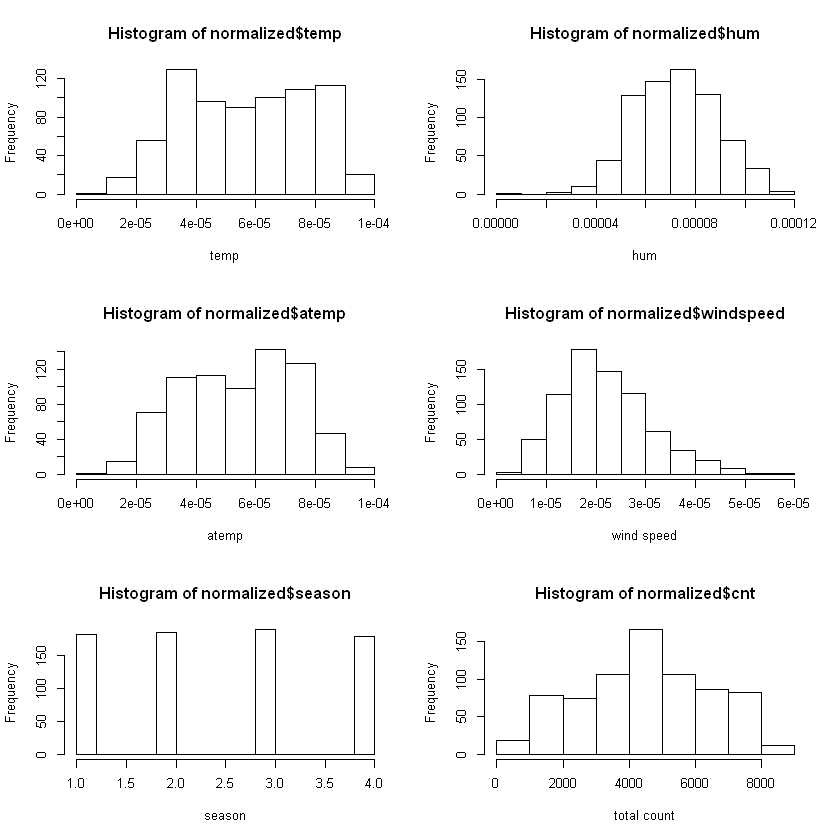

In [265]:
par(mfrow = c(3,2))

hist(normalized$temp, xlab = 'temp')
hist(normalized$hum, xlab = 'hum')
hist(normalized$atemp, xlab = 'atemp')
hist(normalized$windspeed, xlab = 'wind speed')
hist(normalized$season, xlab = 'season')
hist(normalized$cnt, xlab = 'total count')

## Histogramy dla standaryzacji

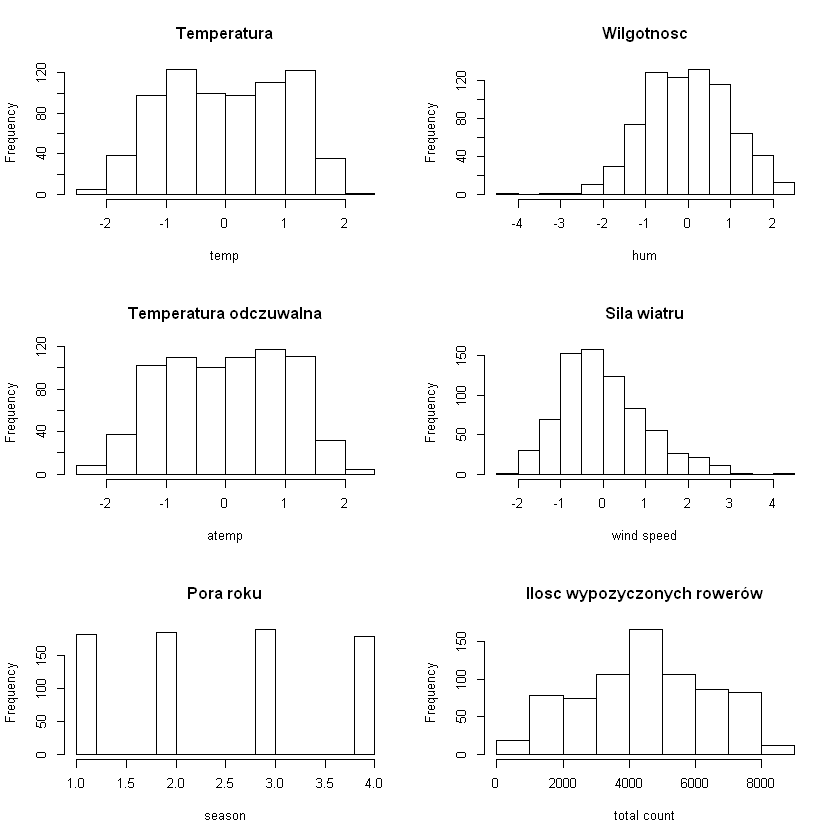

In [266]:
par(mfrow = c(3,2))

hist(stnd$temp, xlab = 'temp', main = "Temperatura")
hist(stnd$hum, xlab = 'hum', main = 'Wilgotność')
hist(stnd$atemp, xlab = 'atemp', main = 'Temperatura odczuwalna')
hist(stnd$windspeed, xlab = 'wind speed', main = 'Siła wiatru')
hist(stnd$season, xlab = 'season',main = 'Pora roku')
hist(stnd$cnt, xlab = 'total count', main = 'Ilość wypożyczonych rowerów')

## Dodaje kolumnę z procentowym udziałem zarejestrowanych userów w całości cnt wypozyczonych rowerow

In [267]:
data_to_add_column <- normalized

data_p <- data.frame(data_to_add_column, 'registered' = (data_to_add_column$registered / data_to_add_column$cnt))
data_p$registered = data_p$registered.1
keeps <- c("temp","atemp",  "hum", "windspeed", "registered", "cnt", "season")
data_p = data_p[keeps]
head(data_p)

temp,atemp,hum,windspeed,registered,cnt,season
3.949587e-05,4.172883e-05,9.247567e-05,1.841244e-05,7.619456e-05,985,1
4.171196e-05,4.059433e-05,7.988146e-05,2.852180e-05,9.598972e-05,801,1
2.253431e-05,2.173571e-05,5.018051e-05,2.849541e-05,1.045496e-04,1349,1
2.295157e-05,2.434267e-05,6.775706e-05,1.839523e-05,1.068233e-04,1562,1
2.604510e-05,2.631053e-05,5.014425e-05,2.144824e-05,1.088765e-04,1600,1
2.345054e-05,2.676257e-05,5.947452e-05,1.027831e-05,1.084698e-04,1606,1


In [268]:
write.csv(data_p, file = "day_with_registered_percent")

## Wartości odstające

,temp,atemp,hum,windspeed,registered,cnt,season
726,2.792437e-05,2.528494e-05,9.448393e-05,3.632614e-05,1.124159e-04,441,1
727,2.916766e-05,2.600895e-05,7.492736e-05,4.018051e-05,1.013495e-04,2114,1
728,2.907195e-05,2.926853e-05,6.770714e-05,1.784152e-05,9.087933e-05,3095,1
729,2.907195e-05,2.781731e-05,8.640314e-05,1.427393e-05,1.011512e-04,1341,1
730,2.935885e-05,2.658940e-05,5.546626e-05,4.025178e-05,9.149959e-05,1796,1
731,2.476853e-05,2.564689e-05,6.627266e-05,1.776980e-05,9.629736e-05,2729,1


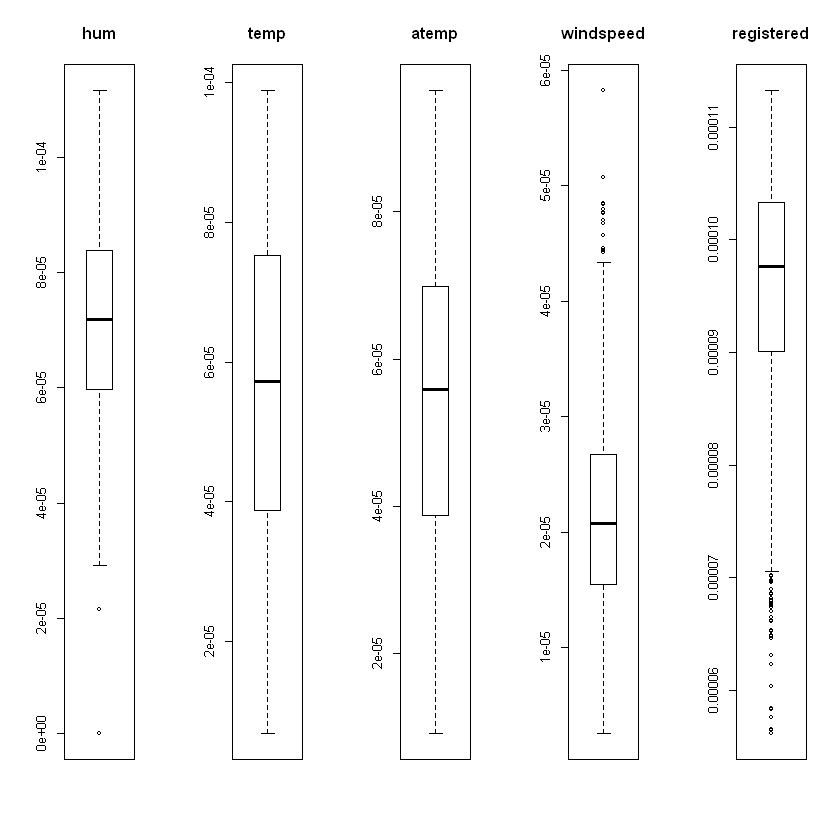

In [269]:
data_to_draw <- data_p

par(mfrow=c(1, 5))

boxplot(data_to_draw$hum, main="hum")
boxplot(data_to_draw$temp, main="temp")
boxplot(data_to_draw$atemp, main="atemp")
boxplot(data_to_draw$windspeed, main="windspeed")
boxplot(data_to_draw$registered, main="registered")
tail(data_p)

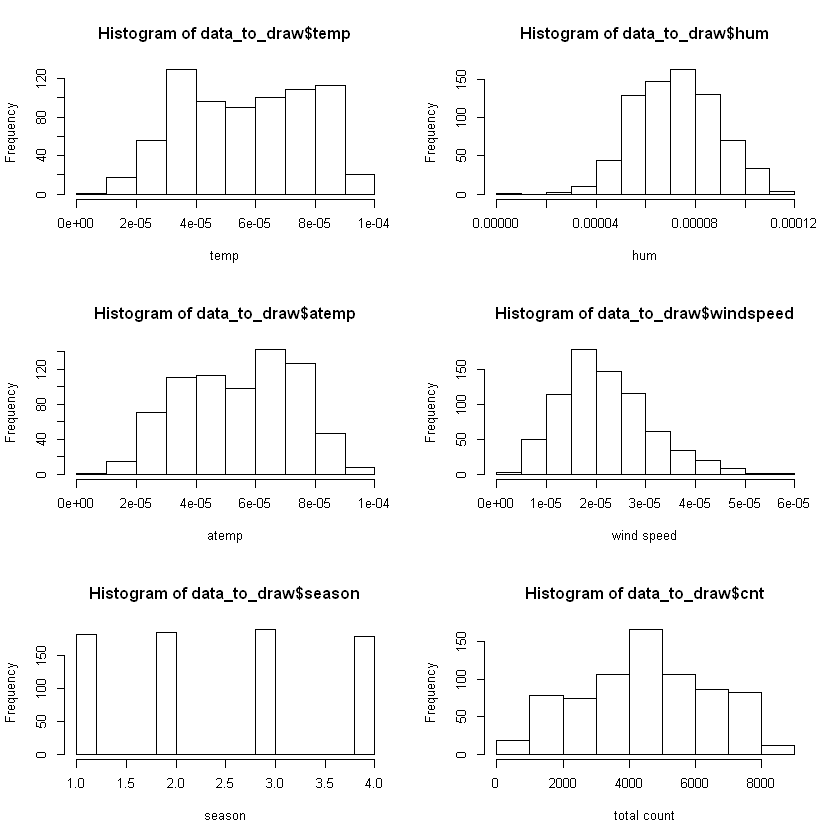

In [270]:
par(mfrow = c(3,2))

hist(data_to_draw$temp, xlab = 'temp')
hist(data_to_draw$hum, xlab = 'hum')
hist(data_to_draw$atemp, xlab = 'atemp')
hist(data_to_draw$windspeed, xlab = 'wind speed')
hist(data_to_draw$season, xlab = 'season')
hist(data_to_draw$cnt, xlab = 'total count')

## DFFITS

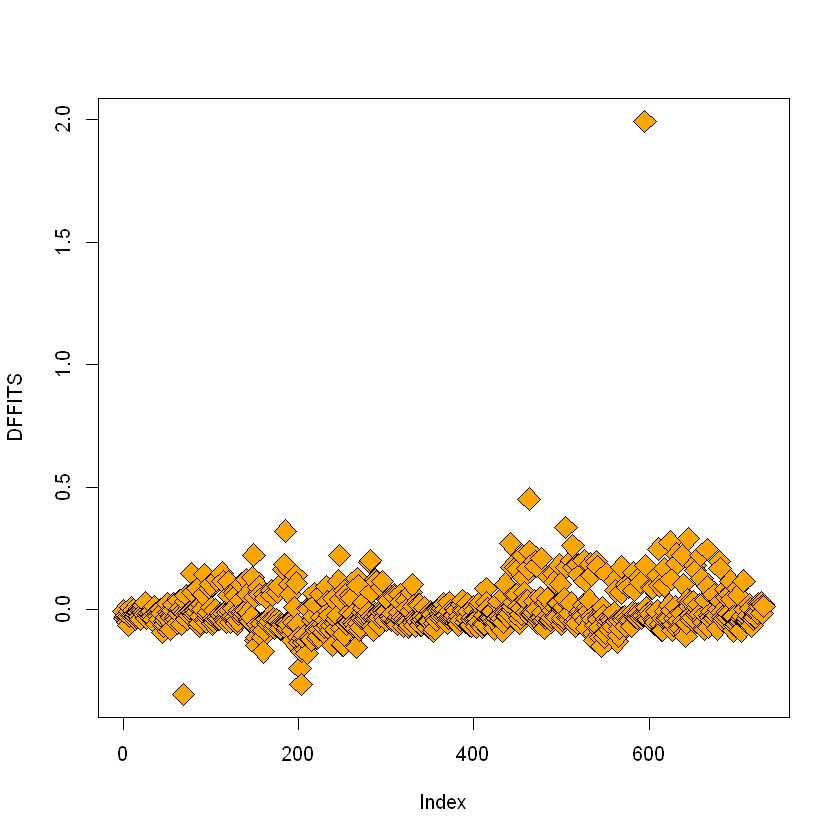

In [323]:
model <- lm(normalized$cnt~normalized$temp + normalized$atemp + normalized$hum + normalized$windspeed + normalized$registered)
plot(dffits(model), pch=23, bg='orange', cex=2, ylab="DFFITS")

wybranie rekordów z wiekszym od progu

In [326]:
x2 <- normalized
x2 <- x2[which(abs(dffits(model)) < 0.2),]

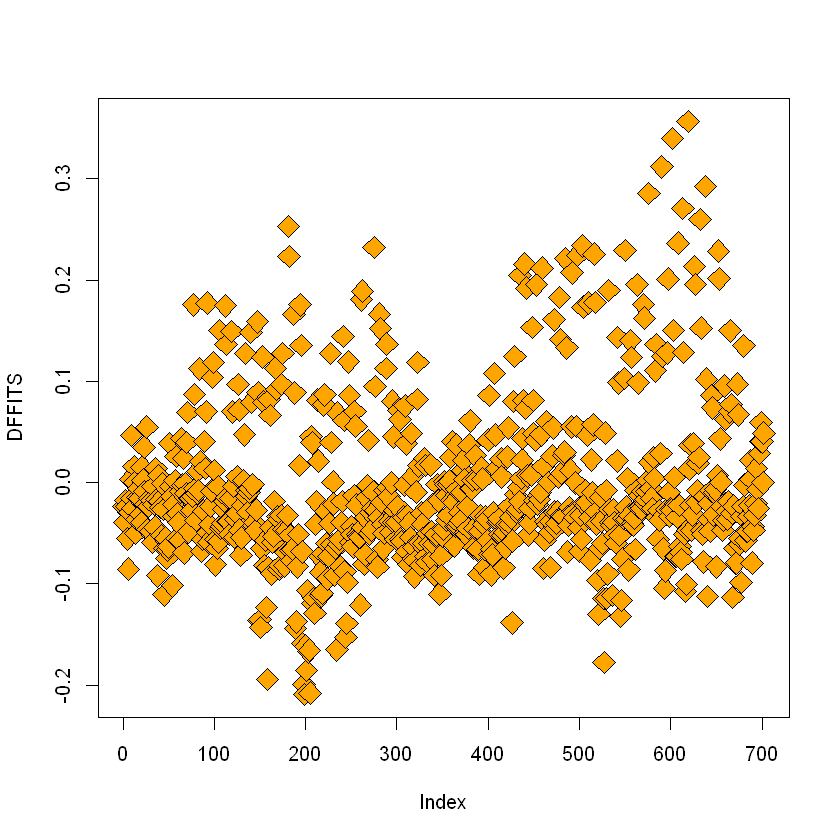

In [328]:
model <- lm(x2$cnt~x2$temp + x2$atemp + x2$hum + x2$windspeed + x2$registered)
plot(dffits(model), pch=23, bg='orange', cex=2, ylab="DFFITS")

In [329]:
removed_rate <- 100 * (1 - (nrow(x2) / nrow(normalized)))

print(removed_rate)

[1] 3.967168


Metoda forward


Call:
lm(formula = x2$cnt ~ x2$temp + x2$atemp + x2$hum + x2$windspeed + 
    x2$registered)

Residuals:
   Min     1Q Median     3Q    Max 
-900.7 -313.1 -142.5  131.3 2103.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.563e+02  1.445e+02   1.773  0.07660 .  
x2$temp       -2.071e+07  1.178e+07  -1.758  0.07918 .  
x2$atemp       4.106e+07  1.342e+07   3.060  0.00230 ** 
x2$hum        -6.770e+06  1.269e+06  -5.334  1.3e-07 ***
x2$windspeed  -6.188e+06  2.327e+06  -2.659  0.00802 ** 
x2$registered  8.990e+03  1.345e+02  66.848  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 499.1 on 696 degrees of freedom
Multiple R-squared:  0.932,	Adjusted R-squared:  0.9315 
F-statistic:  1909 on 5 and 696 DF,  p-value: < 2.2e-16


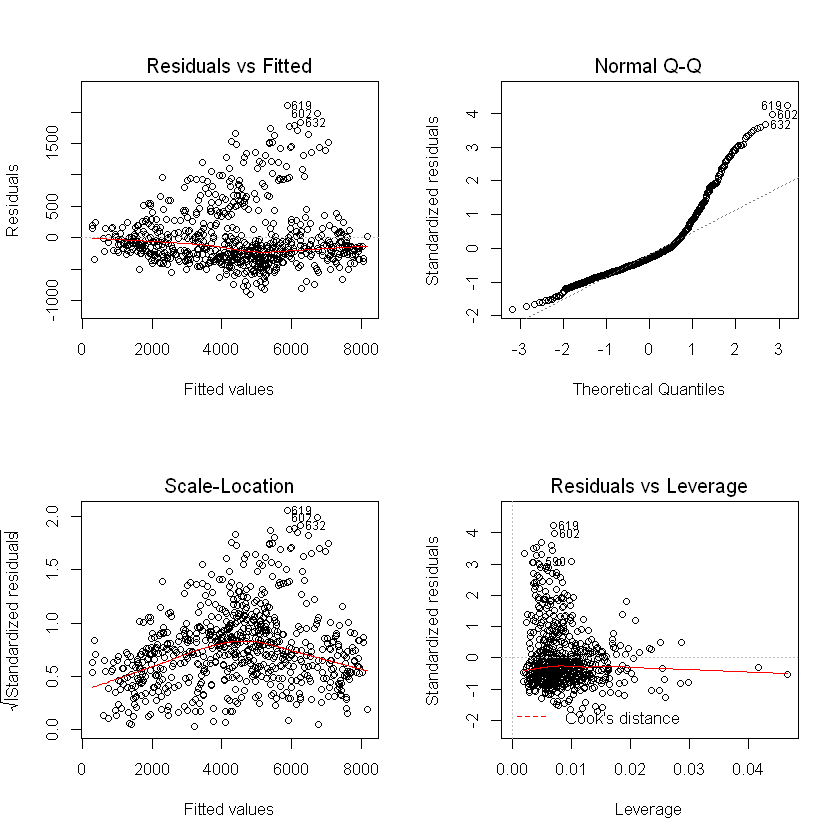

In [330]:
model <- lm(x2$cnt~x2$temp + x2$atemp + x2$hum + x2$windspeed + x2$registered)
summary(model)
par(mfrow=c(2, 2))
plot(model)

In [331]:
model.forward <- step(model, direction="forward", trace=1, scope= ~x2$temp + x2$atemp + x2$hum + x2$windspeed + x2$registered)

Start:  AIC=8728.8
x2$cnt ~ x2$temp + x2$atemp + x2$hum + x2$windspeed + x2$registered



In [332]:
model.backward <- step(model, direction="backward", trace=1, scope= ~x2$temp + x2$atemp + x2$hum + x2$windspeed + x2$registered)

Start:  AIC=8728.8
x2$cnt ~ x2$temp + x2$atemp + x2$hum + x2$windspeed + x2$registered

                Df  Sum of Sq        RSS     AIC
<none>                         173384968  8728.8
- x2$temp        1     769942  174154910  8729.9
- x2$windspeed   1    1761117  175146085  8733.9
- x2$atemp       1    2333008  175717976  8736.2
- x2$hum         1    7088533  180473501  8754.9
- x2$registered  1 1113217990 1286602958 10133.8


Nic nie odrzuciło

In [333]:
write.csv(x2, file = "day_final")